# Lab One: Visualization and Data Preprocessing

by Nino Castellano, Aayush Dalal, Chloe Prowse, Muskaan Mahes

## 1. Business Understanding 

The Student Placement Dataset from Kaggle was collected and analyzed to determine whether students’ results were sufficient to obtain a job offer. The dataset contained over 50,000 records consisting of academic, technical, and soft-skill attributes that can influence the outcome of being placed or not. Therefore, the primary purpose of the dataset is to help students and educational institutions understand which factors are crucial for achieving a successful placement outcome. Using placement results is important, as they can provide real-world examples that can serve as a template for assessing how well a student is prepared for the job market. 

The main objective of this analysis is to explore the relationships between students’ key features and their placement outcome to identify important insights. Therefore, the target variable from the training set, placement status, was used to measure the effectiveness of the student outcome. 


## 2. Data Understanding

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
# Importing Train Dataset for Intial EDA
df = pd.read_csv("train.csv")

# Importing Train Dataset for Model Training
train_df = pd.read_csv("train.csv")

# Impoting Test Dataset for Final Predictions
test_df = pd.read_csv("test.csv")


### 2.1 Describing the Meaning and Type of Data for Each Feature

This dataset contains 14 attributes that describe a student profile. The variable Student_ID is a unique identifier, while Age is a ratio-scale numeric value. The categorical features include Gender, Degree, Branch, and Placement_Status, which are all nominal variables. Additionally, there are academic variables which are all on a ratio-scale: Internships, Projects, Certifications, Backlogs, and CGPA, which is on an interval scale. Skill-related attributes such as Coding_Skills, Communication_Skills, Aptitude_Test_Score, and Soft_Skills_Rating are either on the ordinal or interval scale, ranging from 1 to 10. Therefore, the dataset has numerical, categorical, and ratio features that are crucial for analyzing a student's performance. 


In [2]:
#type of data each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student_ID            45000 non-null  int64  
 1   Age                   45000 non-null  int64  
 2   Gender                45000 non-null  object 
 3   Degree                45000 non-null  object 
 4   Branch                45000 non-null  object 
 5   CGPA                  45000 non-null  float64
 6   Internships           45000 non-null  int64  
 7   Projects              45000 non-null  int64  
 8   Coding_Skills         45000 non-null  int64  
 9   Communication_Skills  45000 non-null  int64  
 10  Aptitude_Test_Score   45000 non-null  int64  
 11  Soft_Skills_Rating    45000 non-null  int64  
 12  Certifications        45000 non-null  int64  
 13  Backlogs              45000 non-null  int64  
 14  Placement_Status      45000 non-null  object 
dtypes: float64(1), int6

### 2.2 Verifying Data Quality (Missing Values, Duplicate Data, Outliers)

After analyzing the dataset, no missing or duplicated data was identified. However, after calculating the interquartile range (IQR) for each numeric variable, several columns were flagged to have potential outliers. These variables were identified to be CGPA, Internships, Projects, and Soft_Skills_Rating. 

In [3]:
#missing values
#to check for any nulls
rows_with_nulls = df[df.isnull().any(axis=1)]
print("Rows with null values: ")
print(rows_with_nulls)

#duplicate data
number_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {number_duplicates}")

Rows with null values: 
Empty DataFrame
Columns: [Student_ID, Age, Gender, Degree, Branch, CGPA, Internships, Projects, Coding_Skills, Communication_Skills, Aptitude_Test_Score, Soft_Skills_Rating, Certifications, Backlogs, Placement_Status]
Index: []

Number of duplicate rows: 0


However, after calculating the interquartile range (IQR) for each numeric variable, several columns were flagged to have potential outliers. Specifically, there were 153 outliers in CGPA, 1652 in Internships, 1130 in Projects, and 4354 in Soft_Skills_Tating. Additionally, these outliers are not data entry errors as they were found through the IQR method. For example, having a high CGPA, such as 9.80, can indicate a strong academic performance, and having multiple internships or projects is realistic for motivated students. Therefore, the outliers can skew the metrics; we should not remove them. Instead, we could extend the bounds to reduce extreme values. 


In [4]:
# checking for outliers
numeric_column = df.select_dtypes(include = ['float64', 'int64']).columns

for col in numeric_column:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\nOutliers in '{col}': ")
    print(outlier[[col]])
    print(f"Total outliers in '{col}': {outlier.shape[0]}")


Outliers in 'Student_ID': 
Empty DataFrame
Columns: [Student_ID]
Index: []
Total outliers in 'Student_ID': 0

Outliers in 'Age': 
Empty DataFrame
Columns: [Age]
Index: []
Total outliers in 'Age': 0

Outliers in 'CGPA': 
       CGPA
685    9.80
690    9.74
776    9.80
1055   9.80
1329   9.80
...     ...
44145  9.80
44540  9.80
44750  9.80
44795  9.76
44873  9.80

[153 rows x 1 columns]
Total outliers in 'CGPA': 153

Outliers in 'Internships': 
       Internships
42               3
55               3
155              3
162              3
187              3
...            ...
44888            3
44909            3
44952            3
44972            3
44973            3

[1652 rows x 1 columns]
Total outliers in 'Internships': 1652

Outliers in 'Projects': 
       Projects
87            6
88            6
113           1
119           1
134           6
...         ...
44756         6
44777         6
44873         6
44933         6
44947         6

[1130 rows x 1 columns]
Total outliers in 

The violin and strip plots depict the distribution and their respective outliers within the four numerical features. In the CGPA plot, even though high values like 9.8 are flagged as outliers, they represent high academic performances. The Intership plot ranges from 0 to 3, with value of 3 considered to be outliers, though they can still reflect real-world scenarios. In the Projects plot, the data is mainly concentrated between ranges 2 and 5, while ranges 1 and 6 are flagged as outliers, which may depict lower or higher engagment. Lastly, the Soft_Skills_Ratings ranged from 1 to 10, and have outliers on both ends. Therefore, these outliers are statistically significant and may not be erroneous. 


<function matplotlib.pyplot.show(close=None, block=None)>

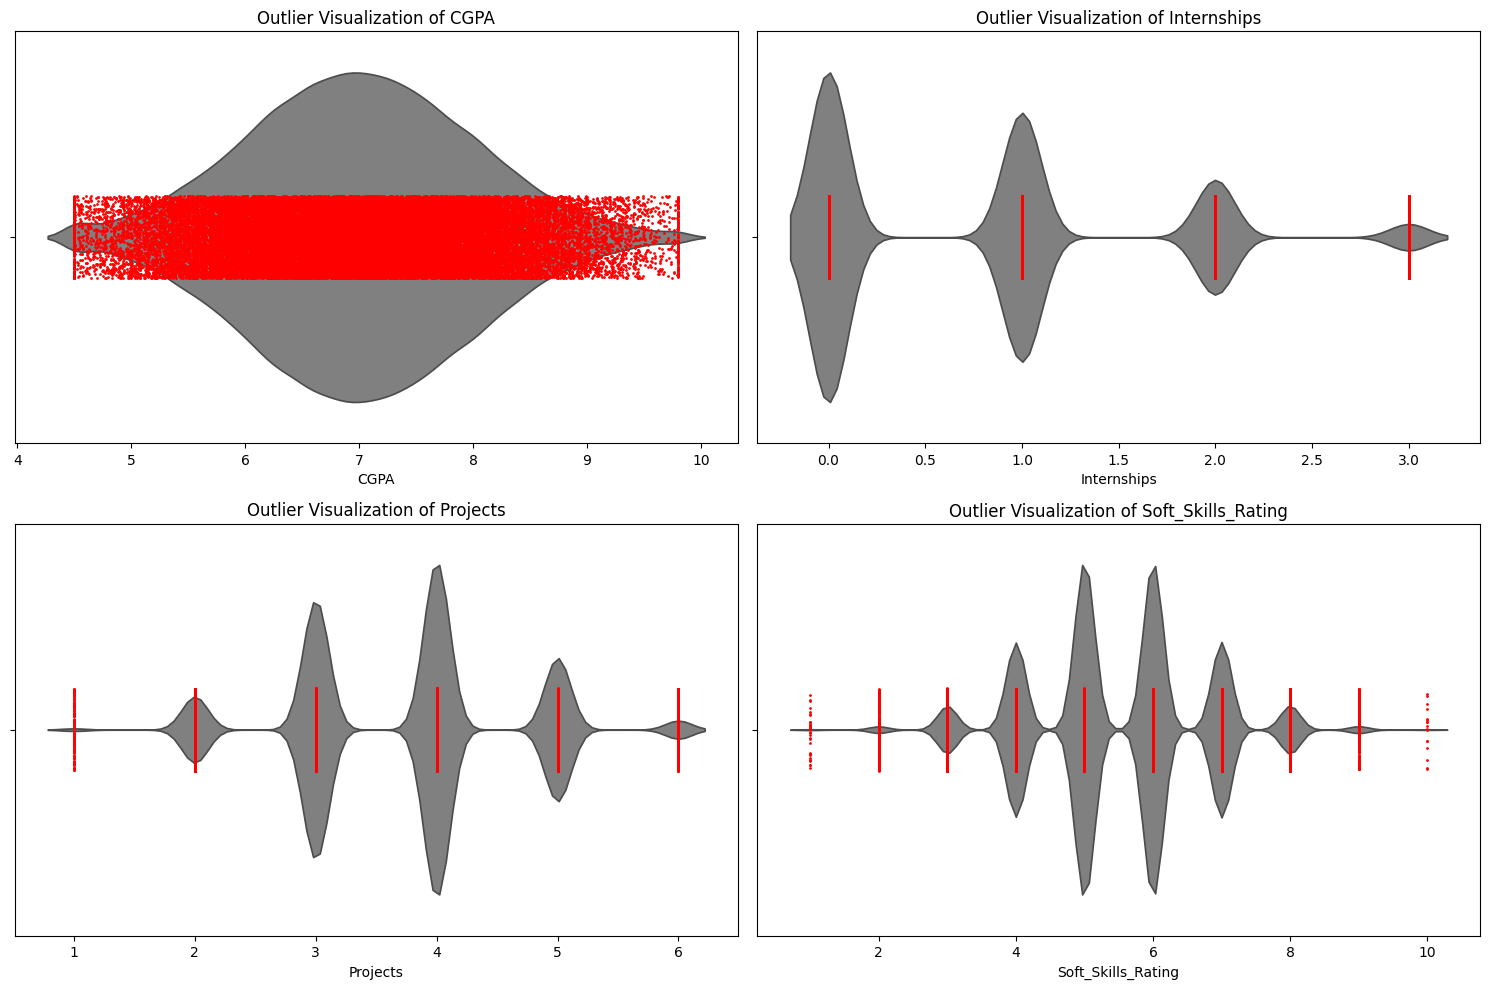

In [5]:
#visualizing outliers
#columns that had outliers
column_outlier = ['CGPA', 'Internships', 'Projects', 'Soft_Skills_Rating']

plt.figure(figsize=(15,10))

#violin and strip plots
for i, col in enumerate(column_outlier, 1):
    plt.subplot(2,2,i)
    sns.violinplot(x=df[col], inner=None, color='gray')
    sns.stripplot(x=df[col], color = 'red', size=2, jitter=True)
    plt.title(f'Outlier Visualization of {col}')

plt.tight_layout()
plt.show

### 2.3 Give Simple Appropriate Statistics 

In [6]:
df = pd.read_csv("train.csv")

df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student_ID            45000 non-null  int64  
 1   Age                   45000 non-null  int64  
 2   Gender                45000 non-null  object 
 3   Degree                45000 non-null  object 
 4   Branch                45000 non-null  object 
 5   CGPA                  45000 non-null  float64
 6   Internships           45000 non-null  int64  
 7   Projects              45000 non-null  int64  
 8   Coding_Skills         45000 non-null  int64  
 9   Communication_Skills  45000 non-null  int64  
 10  Aptitude_Test_Score   45000 non-null  int64  
 11  Soft_Skills_Rating    45000 non-null  int64  
 12  Certifications        45000 non-null  int64  
 13  Backlogs              45000 non-null  int64  
 14  Placement_Status      45000 non-null  object 
dtypes: float64(1), int6

,Student_ID,Age,Gender,Degree,Branch,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs,Placement_Status
count,45000.000000,45000.000000,45000,45000,45000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000
unique,NaN,NaN,2,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Female,B.Sc,ME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Placed
freq,NaN,NaN,22620,11357,9056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28688
mean,24977.962600,20.999333,NaN,NaN,NaN,7.002290,0.774089,3.734222,5.691800,5.501644,69.385356,5.501644,1.800956,0.888133,NaN
std,14425.605704,1.995071,NaN,NaN,NaN,0.993855,0.844750,0.923738,1.994674,1.515374,13.909710,1.238722,0.650104,0.970954,NaN
min,1.000000,18.000000,NaN,NaN,NaN,4.500000,0.000000,1.000000,1.000000,1.000000,35.000000,1.000000,0.000000,0.000000,NaN
25%,12509.750000,19.000000,NaN,NaN,NaN,6.320000,0.000000,3.000000,4.000000,4.000000,60.000000,5.000000,1.000000,0.000000,NaN
50%,24957.500000,21.000000,NaN,NaN,NaN,7.000000,1.000000,4.000000,6.000000,6.000000,69.000000,5.000000,2.000000,1.000000,NaN
75%,37475.250000,23.000000,NaN,NaN,NaN,7.670000,1.000000,4.000000,7.000000,7.000000,79.000000,6.000000,2.000000,2.000000,NaN


#### Dataset Overview and Structure

The Student Placement Dataset contains **45,000 observations** and **15 attributes**, capturing student demographics, academic performance, skill assessments, experiential learning indicators, and placement outcomes.

Inspection of the dataset structure confirms that all variables are correctly typed, with numeric variables representing quantitative measures (e.g., CGPA, skills, aptitude scores) and categorical variables representing qualitative attributes (e.g., gender, degree, branch, placement status). Summary statistics indicate consistent value ranges and plausible distributions across variables.

This initial inspection provides confidence that the dataset is well-structured and suitable for descriptive and inferential analysis.


In [7]:
numeric_cols = df.select_dtypes(include=np.number)

numeric_summary = numeric_cols.agg(
    ['mean', 'median', 'min', 'max', 'std', 'var']
).T

numeric_summary

,mean,median,min,max,std,var
Student_ID,24977.962600,24957.5,1.0,50000.0,14425.605704,2.080981e+08
Age,20.999333,21.0,18.0,24.0,1.995071,3.980310e+00
CGPA,7.002290,7.0,4.5,9.8,0.993855,9.877481e-01
Internships,0.774089,1.0,0.0,3.0,0.844750,7.136022e-01
Projects,3.734222,4.0,1.0,6.0,0.923738,8.532922e-01
Coding_Skills,5.691800,6.0,1.0,10.0,1.994674,3.978723e+00
Communication_Skills,5.501644,6.0,1.0,10.0,1.515374,2.296359e+00
Aptitude_Test_Score,69.385356,69.0,35.0,100.0,13.909710,1.934800e+02
Soft_Skills_Rating,5.501644,5.0,1.0,10.0,1.238722,1.534431e+00
Certifications,1.800956,2.0,0.0,3.0,0.650104,4.226351e-01


#### Summary Statistics for Numeric Variables

Descriptive statistics were computed for all numeric variables, including the **mean, median, minimum, maximum, standard deviation, and variance**. These metrics summarize central tendency and dispersion, offering insight into the overall distribution of each quantitative attribute.

The results indicate moderate academic performance (mean CGPA ≈ 7.0), moderate skill ratings across technical and soft skill categories, and meaningful variability in aptitude test scores. Variables such as internships, projects, certifications, and backlogs show discrete distributions with limited upper bounds, reflecting structured academic and recruitment constraints.

These statistics establish a quantitative baseline for identifying variables that may influence placement outcomes.


In [8]:
range_summary = numeric_cols.max() - numeric_cols.min()
range_summary

Student_ID              49999.0
Age                         6.0
CGPA                        5.3
Internships                 3.0
Projects                    5.0
Coding_Skills               9.0
Communication_Skills        9.0
Aptitude_Test_Score        65.0
Soft_Skills_Rating          9.0
Certifications              3.0
Backlogs                    3.0
dtype: float64

#### Range and Variability Analysis

The range of each numeric variable was calculated to assess the extent of variability within the dataset. Age exhibits a narrow range (18–24), indicating low dispersion and limited explanatory power in isolation.

In contrast, variables such as **CGPA**, **aptitude test scores**, and **skill ratings** display wider ranges, suggesting substantial heterogeneity among students. This variability is important, as it indicates the presence of both high- and low-performing individuals across key evaluative dimensions.

Range analysis complements standard deviation and variance by highlighting the full span of observed values.


In [9]:
categorical_cols = df.select_dtypes(include='object')

categorical_modes = categorical_cols.mode().iloc[0]
categorical_modes

Gender                  Female
Degree                    B.Sc
Branch                      ME
Placement_Status    Not Placed
Name: 0, dtype: object

#### Categorical Variable Distributions

For categorical variables, the **mode** was computed to identify the most frequently occurring category in each attribute. The results show that the most common student profile includes a **female gender**, a **B.Sc degree**, specialization in **Mechanical Engineering**, and a **not placed** outcome.

These modal values provide a high-level summary of the dominant characteristics within the dataset and offer contextual insight into overall placement trends.


In [10]:
missing_summary = df.isna().sum()
missing_summary

Student_ID              0
Age                     0
Gender                  0
Degree                  0
Branch                  0
CGPA                    0
Internships             0
Projects                0
Coding_Skills           0
Communication_Skills    0
Aptitude_Test_Score     0
Soft_Skills_Rating      0
Certifications          0
Backlogs                0
Placement_Status        0
dtype: int64

#### Missing Data Assessment

An evaluation of missing values across all variables indicates that **no missing observations are present** in the dataset.

The absence of missing data strengthens the reliability of descriptive statistics and eliminates the need for imputation or row exclusion. As a result, all 45,000 observations contribute fully to subsequent analyses, reducing potential sources of bias.


In [11]:
df['CGPA'].mean(), df['CGPA'].median()

(np.float64(7.0022902222222205), np.float64(7.0))

#### CGPA Distribution Characteristics

A focused examination of CGPA reveals that the **mean and median are both approximately 7.0**, indicating a balanced distribution of academic performance. This alignment suggests minimal skewness and confirms that the CGPA distribution is representative of the broader student population.

Given its central role in recruitment screening, CGPA emerges as a potentially influential variable, particularly when combined with experiential and skill-based attributes.


#### Descriptive Statistics

This section presents summary statistics for the Student Placement Dataset,
including measures of central tendency and variability for key attributes.

In [12]:
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student_ID            45000 non-null  int64  
 1   Age                   45000 non-null  int64  
 2   Gender                45000 non-null  object 
 3   Degree                45000 non-null  object 
 4   Branch                45000 non-null  object 
 5   CGPA                  45000 non-null  float64
 6   Internships           45000 non-null  int64  
 7   Projects              45000 non-null  int64  
 8   Coding_Skills         45000 non-null  int64  
 9   Communication_Skills  45000 non-null  int64  
 10  Aptitude_Test_Score   45000 non-null  int64  
 11  Soft_Skills_Rating    45000 non-null  int64  
 12  Certifications        45000 non-null  int64  
 13  Backlogs              45000 non-null  int64  
 14  Placement_Status      45000 non-null  object 
dtypes: float64(1), int6

,Student_ID,Age,Gender,Degree,Branch,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs,Placement_Status
count,45000.000000,45000.000000,45000,45000,45000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000
unique,NaN,NaN,2,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Female,B.Sc,ME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Placed
freq,NaN,NaN,22620,11357,9056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28688
mean,24977.962600,20.999333,NaN,NaN,NaN,7.002290,0.774089,3.734222,5.691800,5.501644,69.385356,5.501644,1.800956,0.888133,NaN
std,14425.605704,1.995071,NaN,NaN,NaN,0.993855,0.844750,0.923738,1.994674,1.515374,13.909710,1.238722,0.650104,0.970954,NaN
min,1.000000,18.000000,NaN,NaN,NaN,4.500000,0.000000,1.000000,1.000000,1.000000,35.000000,1.000000,0.000000,0.000000,NaN
25%,12509.750000,19.000000,NaN,NaN,NaN,6.320000,0.000000,3.000000,4.000000,4.000000,60.000000,5.000000,1.000000,0.000000,NaN
50%,24957.500000,21.000000,NaN,NaN,NaN,7.000000,1.000000,4.000000,6.000000,6.000000,69.000000,5.000000,2.000000,1.000000,NaN
75%,37475.250000,23.000000,NaN,NaN,NaN,7.670000,1.000000,4.000000,7.000000,7.000000,79.000000,6.000000,2.000000,2.000000,NaN


In [13]:
numeric_summary.round(2)

,mean,median,min,max,std,var
Student_ID,24977.96,24957.5,1.0,50000.0,14425.61,2.080981e+08
Age,21.00,21.0,18.0,24.0,2.00,3.980000e+00
CGPA,7.00,7.0,4.5,9.8,0.99,9.900000e-01
Internships,0.77,1.0,0.0,3.0,0.84,7.100000e-01
Projects,3.73,4.0,1.0,6.0,0.92,8.500000e-01
Coding_Skills,5.69,6.0,1.0,10.0,1.99,3.980000e+00
Communication_Skills,5.50,6.0,1.0,10.0,1.52,2.300000e+00
Aptitude_Test_Score,69.39,69.0,35.0,100.0,13.91,1.934800e+02
Soft_Skills_Rating,5.50,5.0,1.0,10.0,1.24,1.530000e+00
Certifications,1.80,2.0,0.0,3.0,0.65,4.200000e-01


#### Presentation-Ready Summary Statistics

For clarity and interpretability, numeric summary statistics were rounded to two decimal places. This formatting enhances readability while preserving statistical accuracy, making the results suitable for reporting and visualization.

The rounded summaries reinforce previously observed patterns, including moderate central tendencies, bounded ranges, and meaningful variability across performance-related attributes.


### 2.4 Visualize Most Important Features

While the previous section examined each variable individually using descriptive statistics and intuition to assess potential relevance to job placement, this analysis moves toward a model-based approach. To quantitatively evaluate which features contribute most to predicting placement outcomes, we next apply a Random Forest classifier and examine its feature importance scores.

#### Approach:
1. Run Random Forest Feature Selection Algorithm to access Feature Importance (No Feature Scaling Required)
2. Visualize Important Features

#### Why Use a Random Forest for Feature Importance?
A Random Forest is an ensemble learning method that builds multiple decision trees using different subsets of the data and features. Because each tree makes decisions by repeatedly splitting the data to reduce classification error, the model naturally provides a way to measure how useful each feature is for making accurate predictions.

Feature importance in a Random Forest is computed by measuring how much each feature reduces impurity across all decision trees in the forest. At each split in a tree, the algorithm selects the feature that best separates the data by reducing impurity (measured using metrics such as Gini impurity). The total reduction in impurity contributed by a feature is accumulated across all trees and then normalized so that the importance scores sum to one.

In other words, features that are repeatedly chosen to make informative splits—and lead to purer groupings of placed versus not placed students—receive higher importance scores.

Using this framework, we trained a Random Forest classifier on all available features and extracted the resulting importance scores. The following figure visualizes the relative importance of each variable in predicting job placement.


Top 15 Features (All Variables Model):
 1) Communication_Skills                     0.3147
 2) Backlogs                                 0.1787
 3) CGPA                                     0.1619
 4) Coding_Skills                            0.0979
 5) Projects                                 0.0930
 6) Certifications                           0.0731
 7) Aptitude_Test_Score                      0.0639
 8) Internships                              0.0086
 9) Age                                      0.0018
10) Soft_Skills_Rating                       0.0017
11) Branch_Civil                             0.0011
12) Gender_Male                              0.0006
13) Branch_IT                                0.0006
14) Branch_ME                                0.0005
15) Degree_BCA                               0.0004


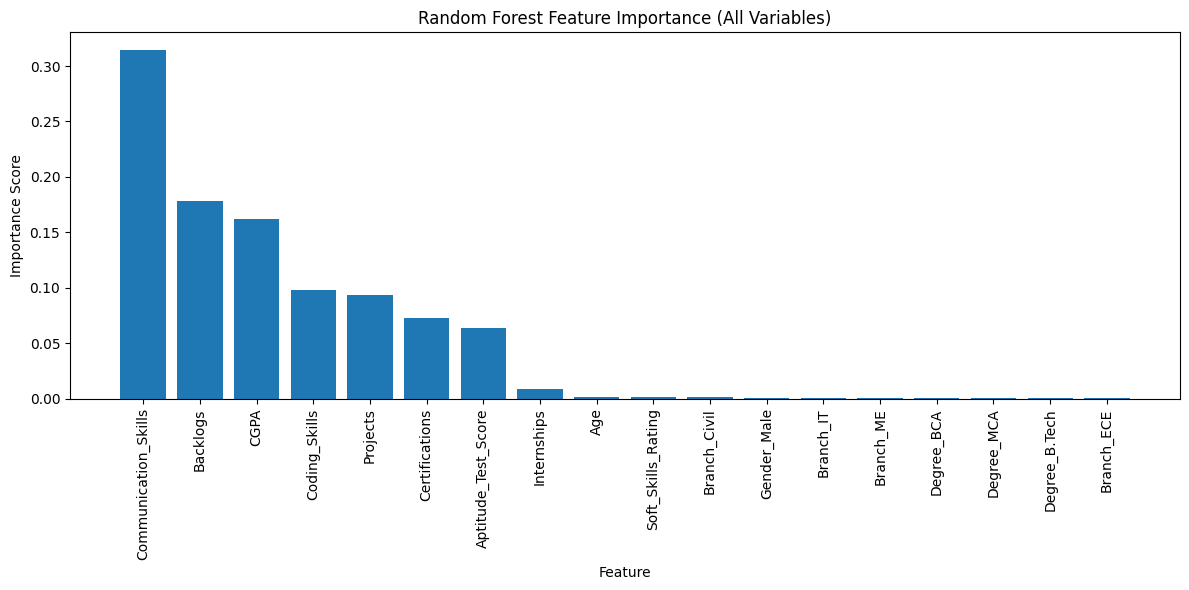

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

import pandas as pd

# Importing Train Dataset for Intial EDA
df = pd.read_csv("../Student Placement Dataset/train.csv")

# Importing Train Dataset for Model Training
train_df = pd.read_csv("../Student Placement Dataset/train.csv")

# Impoting Test Dataset for Final Predictions
test_df = pd.read_csv("../Student Placement Dataset/test.csv")

# All Feature Except Target
numeric_features = [
    'Age',
    'CGPA',
    'Internships',
    'Projects',
    'Coding_Skills',
    'Communication_Skills',
    'Aptitude_Test_Score',
    'Soft_Skills_Rating',
    'Certifications',
    'Backlogs'
]

categorical_features = [
    'Branch',
    'Degree',
    'Gender'
]

# Create X and Y
X_train = train_df[numeric_features + categorical_features]
y_train = train_df['Placement_Status']

X_test = test_df[numeric_features + categorical_features]
y_test = test_df['Placement_Status']

# One-Hot Encode Nominal Features
X_train_encoded = pd.get_dummies(
    X_train,
    columns=categorical_features,
    drop_first=True
)

X_test_encoded = pd.get_dummies(
    X_test,
    columns=categorical_features,
    drop_first=True
)

# Align Train & Test Columns (CRITICAL)
X_train_encoded, X_test_encoded = X_train_encoded.align(
    X_test_encoded,
    join='left',
    axis=1,
    fill_value=0
)

# Train Random Forest (Same Hyperparameters)
rf_all = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)

rf_all.fit(X_train_encoded, y_train)

# Feature Importance (All Variables)
importances = rf_all.feature_importances_
feature_names = X_train_encoded.columns
indices = np.argsort(importances)[::-1]

# Print Feature Rankings
print("\nTop 15 Features (All Variables Model):")
for i in range(15):
    print(
        f"{i+1:2d}) {feature_names[indices[i]]:<40} {importances[indices[i]]:.4f}"
    )

# Feature Importance Plot
plt.figure(figsize=(12,6))
plt.title('Random Forest Feature Importance (All Variables)')

plt.bar(
    range(len(feature_names)),
    importances[indices],
    align='center'
)

plt.xticks(
    range(len(feature_names)),
    feature_names[indices],
    rotation=90
)

plt.ylabel('Importance Score')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()


The feature importance plot ranks variables based on their relative contribution to the model’s predictive performance. Higher bars indicate features that more frequently and more effectively reduce classification uncertainty across the ensemble of trees. While these scores do not imply causation, they provide a strong indication of which variables contain the most predictive signal.

Because categorical variables were one-hot encoded, individual category levels appear separately, and their importance should be interpreted collectively rather than in isolation.

Based on these results, we next focus our analysis on the most influential features identified by the Random Forest in order of their importance:

- Communication_Skills
- Backlogs
- CGPA
- Coding_Skills
- Projects
- Certifications
- Aptitude_Test_Score
- Internships

These variables are further explored through targeted visualizations to better understand how they relate to placement outcomes.

Because categorical variables were one-hot encoded (Branch and Degree), individual category levels appear separately, and their importance should be interpreted collectively rather than in isolation. We will also look at Soft Skills since it was the least important but still to look at it closley. 

#### Communication Feature

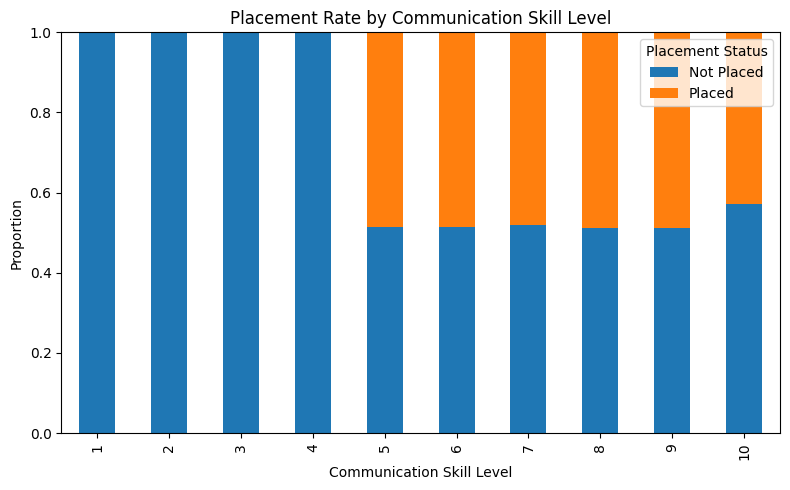

In [2]:
# Ensure correct order
comm_levels = sorted(df['Communication_Skills'].dropna().unique())

comm_counts = (
    df.groupby(['Communication_Skills', 'Placement_Status'])
    .size()
    .unstack(fill_value=0)
)

comm_counts = comm_counts.reindex(comm_levels, fill_value=0)

comm_norm = comm_counts.div(
    comm_counts.sum(axis=1),
    axis=0
)

comm_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5)
)

plt.title('Placement Rate by Communication Skill Level')
plt.xlabel('Communication Skill Level')
plt.ylabel('Proportion')
plt.legend(title='Placement Status')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

To analyze the impact of communication skills on placement outcomes, a stacked bar chart was chosen to visualize the proportion of students placed versus not placed across different communication skill levels. The results reveal a clear pattern: individuals with communication skill levels from 1 to 4 were entirely not placed, indicating that low communication proficiency may be a critical barrier to employability. The plot reveals an interesting nuance: from communication skill levels 5 through 8, the placement rate appears relatively flat.  There’s no dramatic jump in the proportion of placed students across these mid‑range levels, which suggests that within this band, communication skill alone may not be a strong differentiator for placement outcomes.

#### Backlog Feature

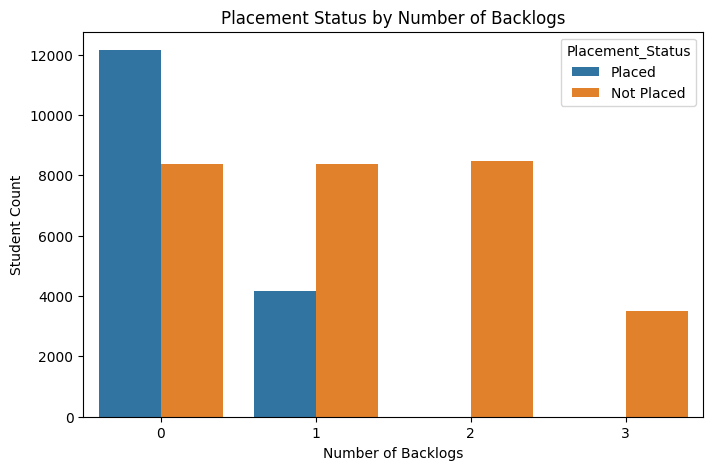

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='Backlogs',
    hue='Placement_Status'
)

plt.title('Placement Status by Number of Backlogs')
plt.xlabel('Number of Backlogs')
plt.ylabel('Student Count')
plt.show()

To assess the impact of academic backlogs on placement outcomes, a bar chart was used to compare student counts across different backlog levels and placement statuses. The results show a strong inverse relationship: students with zero backlogs have the highest placement count, while those with one backlog already show a sharp drop in placement numbers. For students with two or more backlogs, placement is nonexistent—every student in these categories is not placed. This stark pattern suggests that even a single backlog significantly reduces placement chances, and multiple backlogs may act as a hard barrier to employability. The visual underscores the importance of academic consistency and reinforces backlog count as a critical feature in predicting placement success.

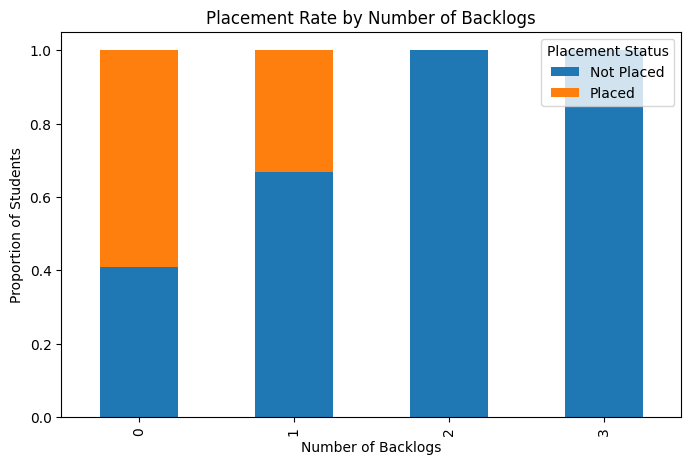

In [29]:
backlog_rate = (
    df.groupby(['Backlogs', 'Placement_Status'])
    .size()
    .unstack(fill_value=0)
)

backlog_norm = backlog_rate.div(backlog_rate.sum(axis=1), axis=0)

backlog_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title('Placement Rate by Number of Backlogs')
plt.xlabel('Number of Backlogs')
plt.ylabel('Proportion of Students')
plt.legend(title='Placement Status')
plt.show()

This proportion-based bar chart reinforces the strong negative impact of academic backlogs on placement probability. Students with zero backlogs show a substantial placement rate, while those with one backlog experience a noticeable drop. For students with two or three backlogs, the placement rate falls to zero—every individual in these categories is not placed. This visual confirms the earlier observation: as the number of backlogs increases, placement probability sharply declines, with multiple backlogs acting as a clear barrier to employability. The pattern is consistent and decisive, making backlog count a critical feature for predicting placement outcomes.

#### C-GPA Feature

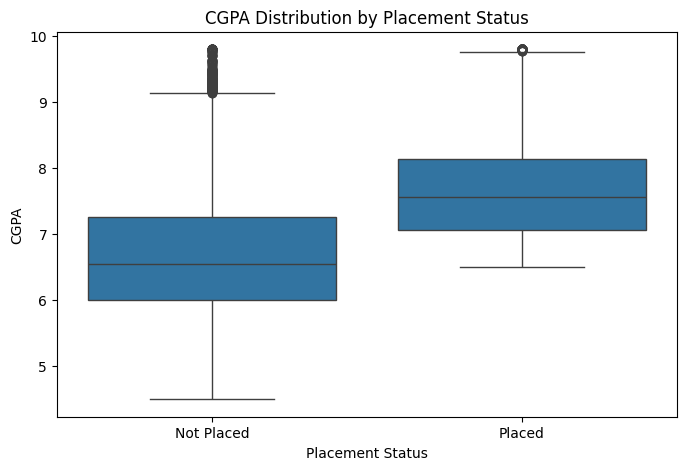

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Placement_Status', y='CGPA', data=df)

plt.title('CGPA Distribution by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('CGPA')
plt.show()

To examine how CGPA relates to placement outcomes, I chose a box plot to visualize the distribution of GPAs for placed and not placed students. Box plots are ideal for comparing central tendency, spread, and outliers between groups, making it easier to detect meaningful differences.

The results show a noticeable shift in CGPA distributions between the two groups. Students who were placed tend to have higher GPAs, with a median around 7.5, compared to about 6.5 for those not placed. The placed group also shows a tighter interquartile range and fewer low-end values. This suggests that higher academic performance may be positively associated with placement success, making CGPA a potentially important predictor.

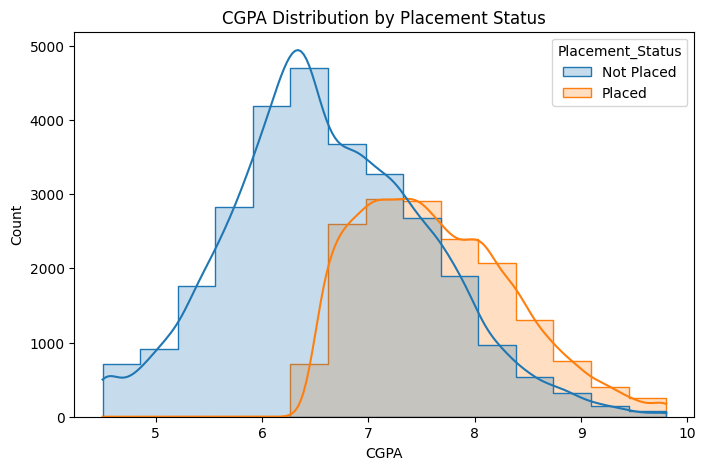

In [26]:
plt.figure(figsize=(8,5))

sns.histplot(
    data=df,
    x='CGPA',
    hue='Placement_Status',
    bins=15,
    kde=True,
    element='step'
)

plt.title('CGPA Distribution by Placement Status')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

To gain deeper insight into how CGPA relates to placement outcomes, I used a distribution chart with overlaid density plots. This visualization allows us to compare the full shape of CGPA distributions for placed and not placed students, beyond just summary statistics.

The results show a clear separation between the two groups. Students who were placed tend to have higher CGPAs, with their distribution skewed toward the upper end of the scale. In contrast, the not placed group is more concentrated around lower CGPA values. This pattern reinforces the earlier box plot findings and suggests that higher academic performance is associated with a greater likelihood of placement.

C:\Users\SeanPC\AppData\Local\Temp\ipykernel_22460\1682995637.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('CGPA_bin')
C:\Users\SeanPC\AppData\Local\Temp\ipykernel_22460\1682995637.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .size() / df.groupby('CGPA_bin').size()


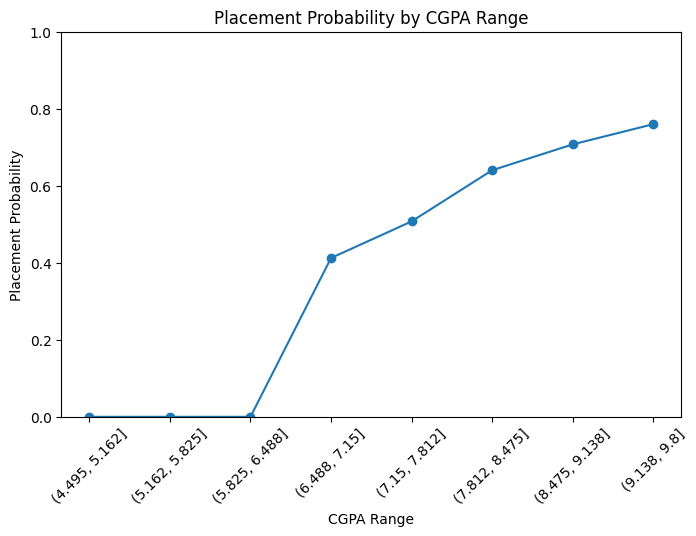

In [27]:
import numpy as np

# Bin CGPA
df['CGPA_bin'] = pd.cut(df['CGPA'], bins=8)

placement_prob = (
    df[df['Placement_Status'] == 'Placed']
    .groupby('CGPA_bin')
    .size() / df.groupby('CGPA_bin').size()
)

plt.figure(figsize=(8,5))
plt.plot(
    placement_prob.index.astype(str),
    placement_prob.values,
    marker='o'
)

plt.title('Placement Probability by CGPA Range')
plt.xlabel('CGPA Range')
plt.ylabel('Placement Probability')
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.show()

To explore how CGPA influences placement outcomes more precisely, I plotted placement probability across CGPA ranges. This approach goes beyond summary statistics and shows how the likelihood of being placed changes as academic performance improves.

The results reveal a clear upward trend. Students with CGPAs below 6.5 have near-zero placement probability, but the likelihood increases steadily with higher CGPA ranges. In the top range (above 9.1), placement probability reaches around 75%. This pattern strongly suggests that higher CGPA is positively associated with placement success, reinforcing earlier findings from the box plot and distribution chart.

#### Coding Skills Feature

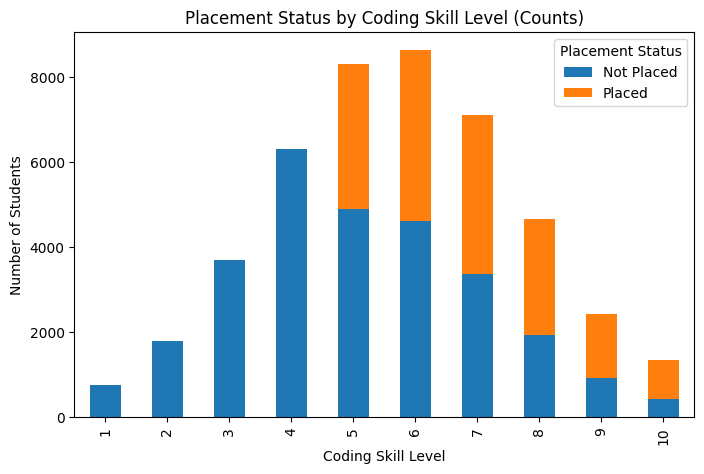

In [22]:
coding_counts = (
    df.groupby(['Coding_Skills', 'Placement_Status'])
    .size()
    .unstack(fill_value=0)
)

# Ensure ordinal order (1 → highest, or as defined in your data)
coding_counts = coding_counts.sort_index()

# Plot stacked bar chart
coding_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title('Placement Status by Coding Skill Level (Counts)')
plt.xlabel('Coding Skill Level')
plt.ylabel('Number of Students')
plt.legend(title='Placement Status')
plt.show()

To evaluate how coding skill level influences placement outcomes, I used a bar chart showing placement counts across skill levels from 1 to 10. This visualization helps identify trends in employability as coding proficiency increases.

The results show a clear upward pattern. Students with lower coding skill levels (especially 1–4) are predominantly not placed, while those with higher skill levels (5–10) show a growing proportion of placements. The shift becomes especially noticeable around level 5, where the number of placed students begins to rival or exceed the not placed group. This suggests that stronger coding skills are positively associated with placement success, likely reflecting the technical requirements of the roles students are entering.

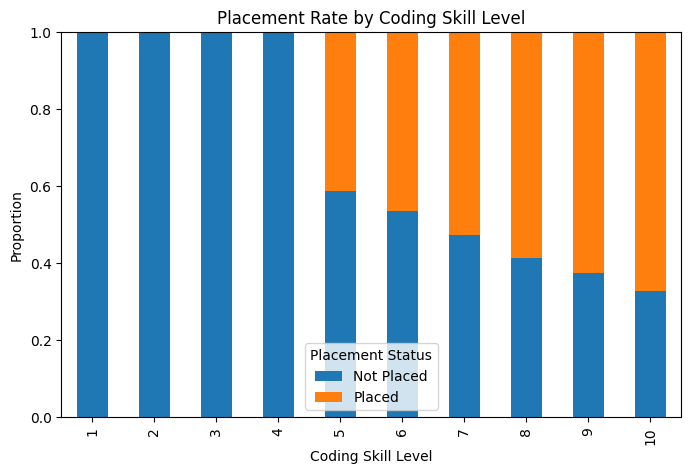

In [23]:
# Ensure correct ordering
skill_levels = sorted(df['Coding_Skills'].dropna().unique())

coding_counts = (
    df.groupby(['Coding_Skills', 'Placement_Status'])
    .size()
    .unstack(fill_value=0)
)

coding_counts = coding_counts.reindex(skill_levels, fill_value=0)

coding_norm = coding_counts.div(
    coding_counts.sum(axis=1),
    axis=0
)

coding_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title('Placement Rate by Coding Skill Level')
plt.xlabel('Coding Skill Level')
plt.ylabel('Proportion')
plt.legend(title='Placement Status')
plt.ylim(0, 1)
plt.show()

To assess how coding proficiency affects placement outcomes, I used a normalized bar chart showing placement proportions across coding skill levels from 1 to 10. This approach removes bias from group size differences and focuses purely on the likelihood of placement at each skill level.

The results reveal a striking pattern. Students with coding skill levels between 1 and 4 have a 100% not placed rate — none of them secured placements. Starting from level 5, placement probability begins to rise, and by levels 9 and 10, the majority of students are placed. This suggests a strong threshold effect: low coding skill is a major barrier to placement, while higher proficiency significantly improves employability.

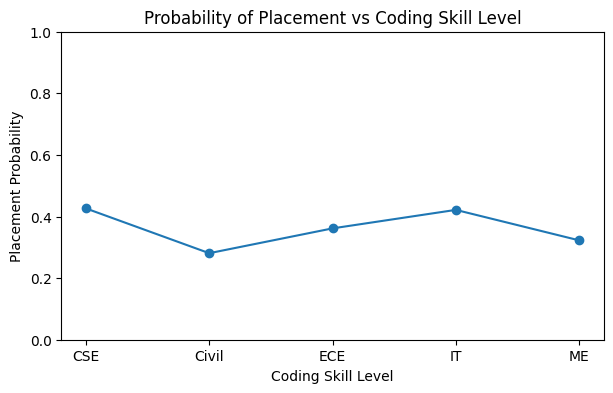

In [24]:
plt.figure(figsize=(7,4))
plt.plot(
    placement_rate.index,
    placement_rate.values,
    marker='o'
)

plt.title('Probability of Placement vs Coding Skill Level')
plt.xlabel('Coding Skill Level')
plt.ylabel('Placement Probability')
plt.ylim(0,1)
plt.show()

To reinforce the upward trend observed in earlier visualizations, I plotted placement probability against coding skill level. This line graph offers a clean, continuous view of how placement likelihood evolves as coding proficiency increases.

The results confirm a strong positive relationship. Placement probability rises steadily from level 5 onward, reaching its peak near level 10. This consistent increase supports the conclusion that higher coding skill levels are strongly associated with better placement outcomes, making this feature a compelling candidate for inclusion in predictive modeling.

#### Projects Feature

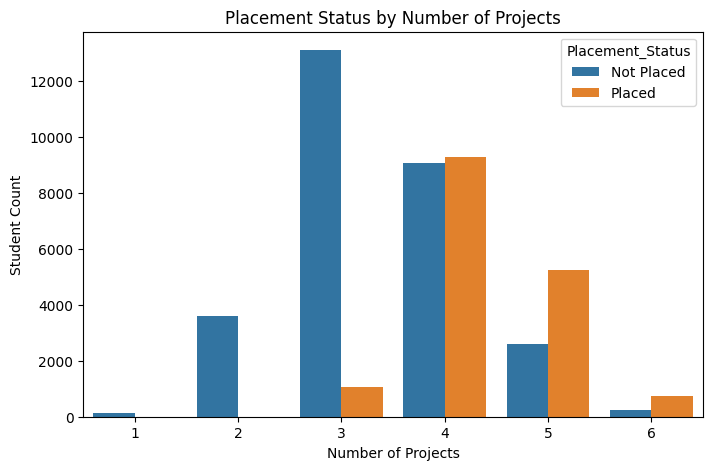

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='Projects',
    hue='Placement_Status'
)

plt.title('Placement Status by Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Student Count')
plt.show()

To examine how project experience relates to placement outcomes, I used a bar chart showing the count of placed and not placed students across different project counts. This visualization helps reveal how placement status varies with the number of completed projects, making it easier to spot trends in employability.

The results suggest a positive relationship. Students with fewer projects (1–3) are more likely to be not placed, while those with 4 or more projects show higher placement counts. The shift becomes especially noticeable at 4 projects, where the number of placed students overtakes the not placed group. This pattern indicates that project experience may contribute meaningfully to placement success, possibly by signaling stronger skills or initiative.

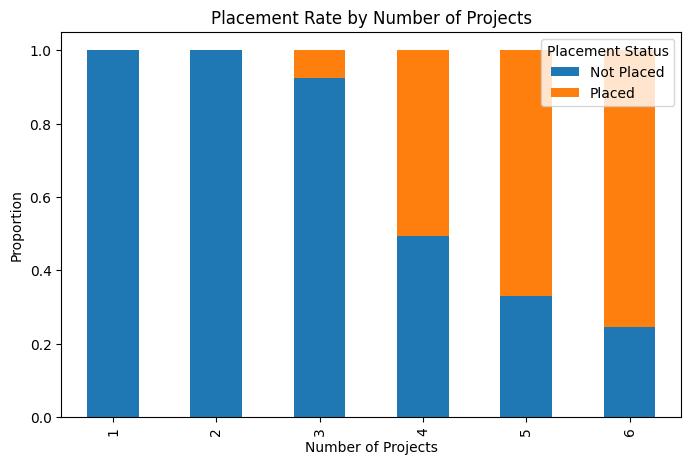

In [20]:
project_rate = (
    df.groupby(['Projects', 'Placement_Status'])
    .size()
    .unstack()
)

project_norm = project_rate.div(
    project_rate.sum(axis=1),
    axis=0
)

project_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title('Placement Rate by Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Proportion')
plt.legend(title='Placement Status')
plt.show()

To eliminate bias from raw counts, I used a proportion-based bar chart to analyze placement outcomes across project counts. This visualization reveals not just how many students were placed, but how likely placement was within each project group.

The results show a sharp divide at lower project counts. For students with 1 or 2 projects, placement rates are effectively zero — the bars are entirely blue, indicating that none of these students were placed. Placement probability begins to rise only from 3 projects onward, suggesting a possible threshold effect. This pattern implies that having very few projects may significantly reduce placement chances, and that a minimum level of project experience could be critical for employability.

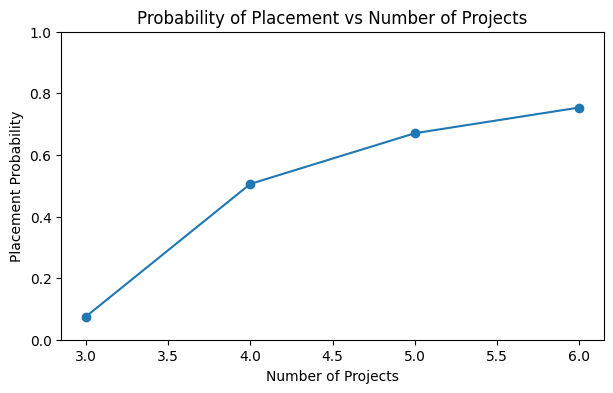

In [21]:
placement_prob = (
    df[df['Placement_Status'] == 'Placed']
    .groupby('Projects')
    .size() / df.groupby('Projects').size()
)

plt.figure(figsize=(7,4))
plt.plot(
    placement_prob.index,
    placement_prob.values,
    marker='o'
)

plt.title('Probability of Placement vs Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Placement Probability')
plt.ylim(0,1)
plt.show()

To reinforce the pattern observed in earlier visualizations, I plotted placement probability against the number of projects. This line graph offers a clearer view of how placement likelihood changes as project experience increases.

The results show a strong upward trend. Placement probability rises sharply from just 10% at 3 projects to 80% at 6 projects, suggesting a consistent and meaningful relationship. This supports the idea that students with more project experience are significantly more likely to be placed, highlighting project count as a potentially influential predictor of placement success.

#### Certification Feature 

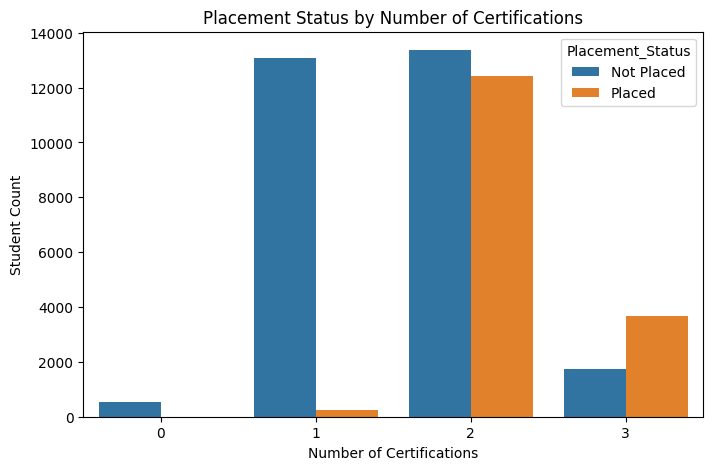

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='Certifications',
    hue='Placement_Status'
)

plt.title('Placement Status by Number of Certifications')
plt.xlabel('Number of Certifications')
plt.ylabel('Student Count')
plt.show()

To explore the impact of certifications on placement outcomes, a bar chart was used to compare student counts across different certification levels and placement statuses. The visual shows that students with zero or one certification are predominantly not placed, while those with two certifications have a more balanced distribution. Notably, students with three certifications show a higher number of placements than non-placements, suggesting that having multiple certifications may positively influence placement success. This trend implies that certifications could serve as a valuable differentiator in the job selection process, especially when accumulated beyond a basic level.

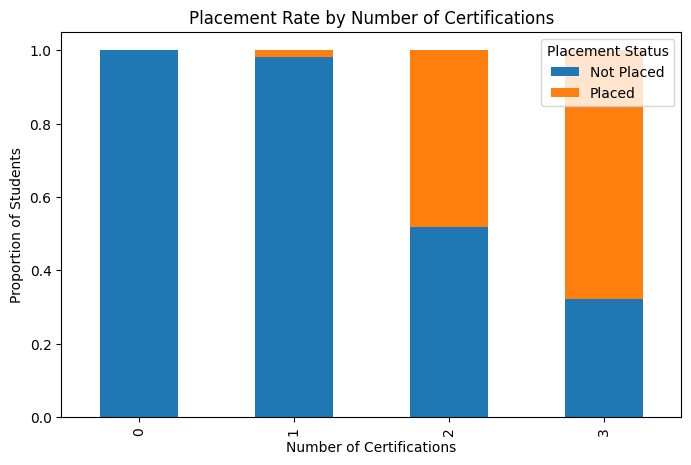

In [18]:
cert_rate = (
    df.groupby(['Certifications', 'Placement_Status'])
    .size()
    .unstack(fill_value=0)
)

cert_norm = cert_rate.div(cert_rate.sum(axis=1), axis=0)

cert_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title('Placement Rate by Number of Certifications')
plt.xlabel('Number of Certifications')
plt.ylabel('Proportion of Students')
plt.legend(title='Placement Status')
plt.show()

To better understand how the number of certifications influences placement outcomes, a proportion-based bar chart was used to visualize placement rates across certification levels. This chart removes the bias of raw counts and focuses on relative success within each group. The results show a clear upward trend: students with zero certifications were entirely not placed, and those with one certification had very low placement rates. At two certifications, placement and non-placement proportions are nearly equal, while students with three certifications show a noticeably higher placement rate. This pattern suggests that accumulating more certifications may significantly improve placement probability, especially beyond the one-certification threshold, reinforcing the value of continuous skill development in enhancing employability.

#### Aptitude Test Score Feature

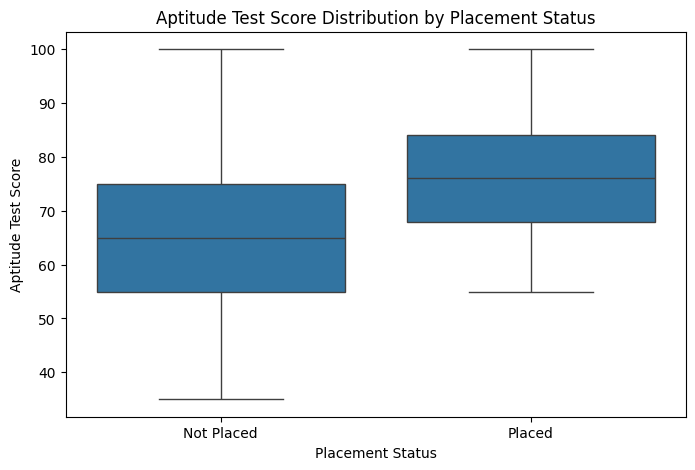

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Placement_Status', y='Aptitude_Test_Score', data=df)

plt.title('Aptitude Test Score Distribution by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Aptitude Test Score')
plt.show()

To examine how aptitude test scores relate to placement outcomes, a box plot was used to compare score distributions between placed and not placed students. This visualization highlights key differences: placed students tend to have higher median scores and a tighter interquartile range, while not placed students show a wider spread and lower central tendency. The contrast in distributions suggests that stronger aptitude performance may be associated with a greater likelihood of placement, making test scores a potentially influential factor in the selection process.

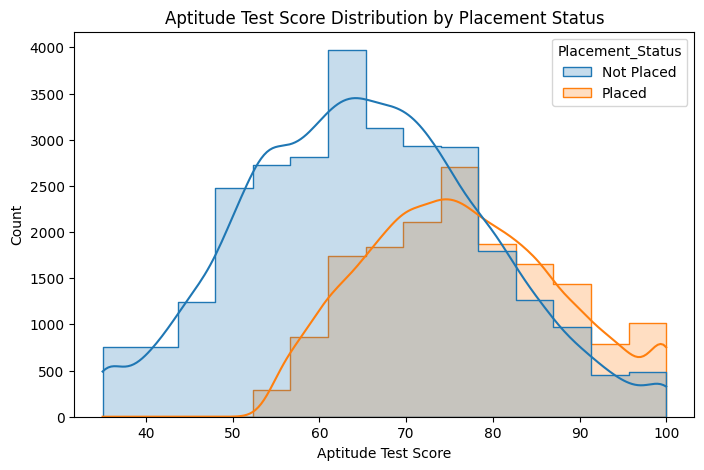

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x='Aptitude_Test_Score',
    hue='Placement_Status',
    bins=15,
    kde=True,
    element='step'
)

plt.title('Aptitude Test Score Distribution by Placement Status')
plt.xlabel('Aptitude Test Score')
plt.ylabel('Count')
plt.show()

To further explore how aptitude test scores relate to placement outcomes, a histogram with overlaid density plots was used to compare score distributions between placed and not placed students. This visualization reinforces the differences observed in the earlier box plot: the distribution for placed students is clearly shifted toward higher scores, with a peak around the 75–85 range. In contrast, the not placed group shows a broader spread with a peak closer to the 60–65 range and a longer tail toward lower scores. The separation between the two density curves suggests that higher aptitude scores are more common among placed individuals, supporting the idea that test performance may play a meaningful role in placement decisions. This visual not only confirms the central tendency differences but also highlights how the overall shape and concentration of scores differ between the two groups.

C:\Users\SeanPC\AppData\Local\Temp\ipykernel_22460\1704081275.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Score_bin')
C:\Users\SeanPC\AppData\Local\Temp\ipykernel_22460\1704081275.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .size() / df.groupby('Score_bin').size()


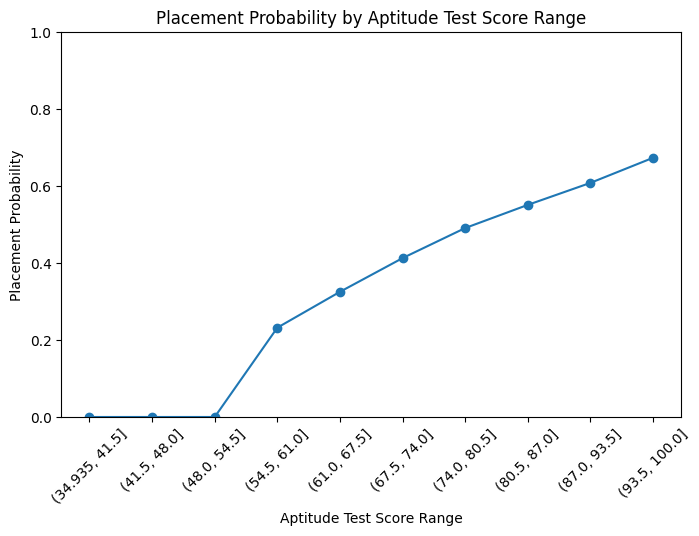

In [16]:
# Bin scores into 10-point ranges
df['Score_bin'] = pd.cut(df['Aptitude_Test_Score'], bins=10)

placement_prob = (
    df[df['Placement_Status'] == 'Placed']
    .groupby('Score_bin')
    .size() / df.groupby('Score_bin').size()
)

plt.figure(figsize=(8,5))
plt.plot(
    placement_prob.index.astype(str),
    placement_prob.values,
    marker='o'
)

plt.title('Placement Probability by Aptitude Test Score Range')
plt.xlabel('Aptitude Test Score Range')
plt.ylabel('Placement Probability')
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.show()

To assess how aptitude test scores influence placement likelihood, a line graph was used to plot placement probability across score ranges. This visualization provides a clear, continuous view of how placement outcomes shift with increasing test performance. The results show a steady upward trend: placement probability begins near zero in the lowest score range and rises consistently across intervals, reaching approximately 70% in the highest range. This pattern reinforces the idea that higher aptitude scores are strongly associated with greater placement success, making test performance a valuable predictor in modeling and decision-making. The smooth progression also suggests that improvements in test scores—even within moderate ranges—can meaningfully enhance placement chances.

#### Internship Feature

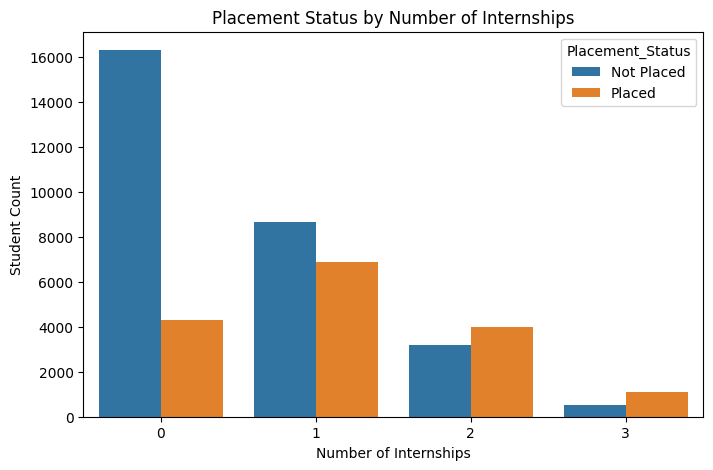

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='Internships',
    hue='Placement_Status'
)

plt.title('Placement Status by Number of Internships')
plt.xlabel('Number of Internships')
plt.ylabel('Student Count')
plt.show()

To explore how internship experience affects placement outcomes, I used a bar chart to compare placement status across different internship counts. This visualization shows, for each internship level (0 to 3), how many students were placed versus not placed, allowing us to assess trends in placement success relative to internship exposure.

The results reveal a strong positive association. Students with no internships have the lowest placement count, while those with more internships—especially 2 or 3—show a higher proportion of placements. This suggests that internship experience may significantly boost placement chances, likely due to enhanced skills, industry exposure, and employability.

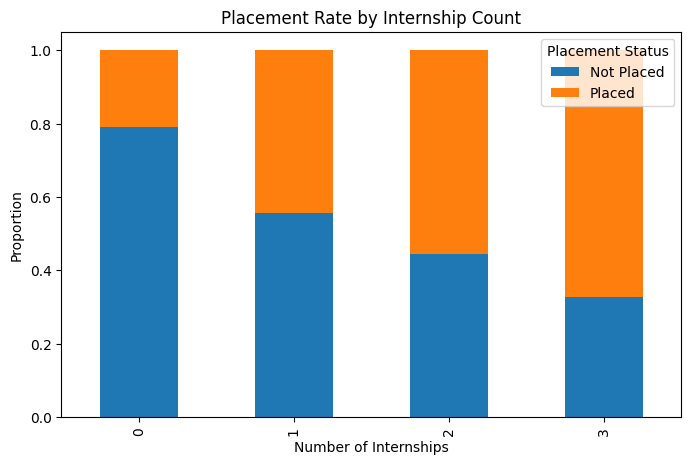

In [13]:
internship_rate = (
    df.groupby(['Internships', 'Placement_Status'])
    .size()
    .unstack()
)

internship_norm = internship_rate.div(
    internship_rate.sum(axis=1),
    axis=0
)

internship_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title('Placement Rate by Internship Count')
plt.xlabel('Number of Internships')
plt.ylabel('Proportion')
plt.legend(title='Placement Status')
plt.show()

To avoid the bias introduced by raw counts, I used a proportion-based bar chart to analyze placement outcomes across internship counts. This approach normalizes the data, allowing us to compare placement rates fairly across groups of different sizes.

The results show a strong upward trend in placement proportion as internship experience increases. Students with zero internships have the lowest placement rate, while those with three internships show the highest. This pattern suggests that internship experience is positively correlated with placement success, and may be a key factor influencing employability.

#### Branch Feature

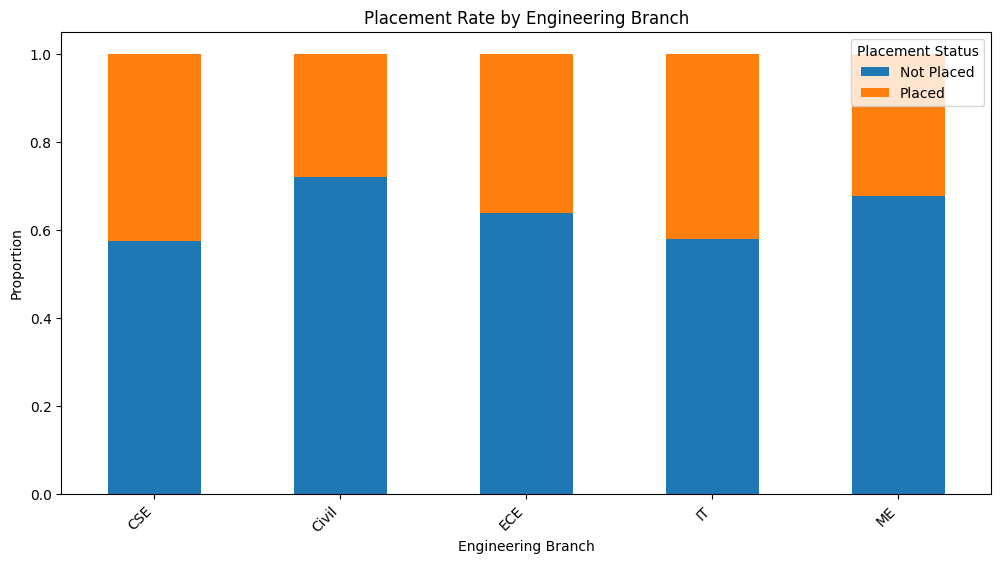

In [9]:
branch_placement = (
    df.groupby(['Branch', 'Placement_Status'])
    .size()
    .unstack()
)

branch_norm = branch_placement.div(branch_placement.sum(axis=1), axis=0)

branch_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6)
)

plt.title('Placement Rate by Engineering Branch')
plt.xlabel('Engineering Branch')
plt.ylabel('Proportion')
plt.legend(title='Placement Status')
plt.xticks(rotation=45, ha='right')
plt.show()

The normalized bar chart compares placement proportions across engineering branches, revealing slight differences in placement rates. Branches like CSE and IT show marginally higher placement proportions, which could suggest that specialization may play a role in placement outcomes. However, these differences are not pronounced, and further statistical analysis would be needed to confirm whether branch is a significant predictor of placement.

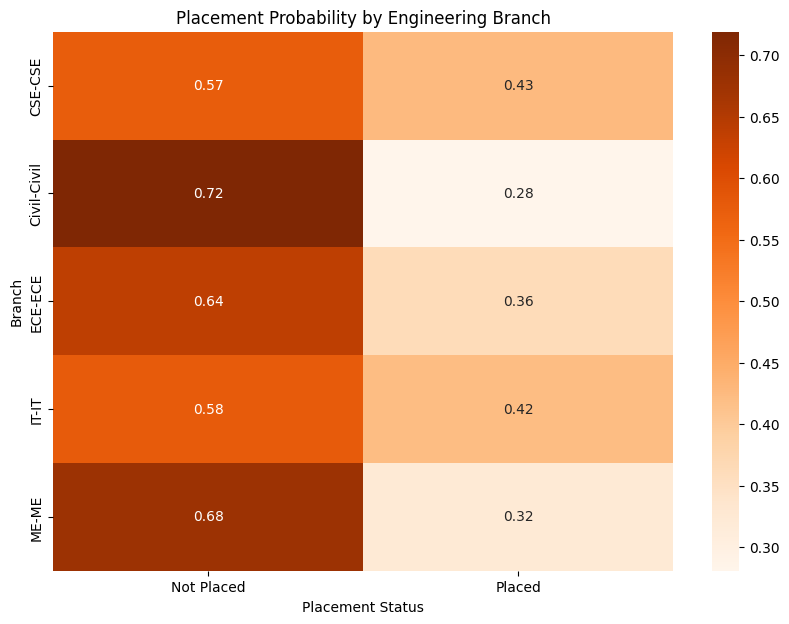

In [10]:
heatmap_data = (
    df.groupby(['Branch', 'Placement_Status'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
    .unstack()
)

plt.figure(figsize=(10,7))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.2f',
    cmap='Oranges'
)

plt.title('Placement Probability by Engineering Branch')
plt.xlabel('Placement Status')
plt.ylabel('Branch')
plt.show()

To investigate subtle differences in placement outcomes across engineering branches, I used a heatmap to visualize normalized probabilities. Unlike bar charts, heatmaps allow for quick comparison of exact values and color intensity, making it easier to spot patterns across categories.

The results reveal meaningful variation in placement probabilities among branches. For example, CSE and IT show higher placement probabilities (around 42–43%), while Civil and ME have noticeably lower rates (28–32%). This suggests that branch specialization may influence placement outcomes, and these differences warrant further analysis to assess statistical significance.

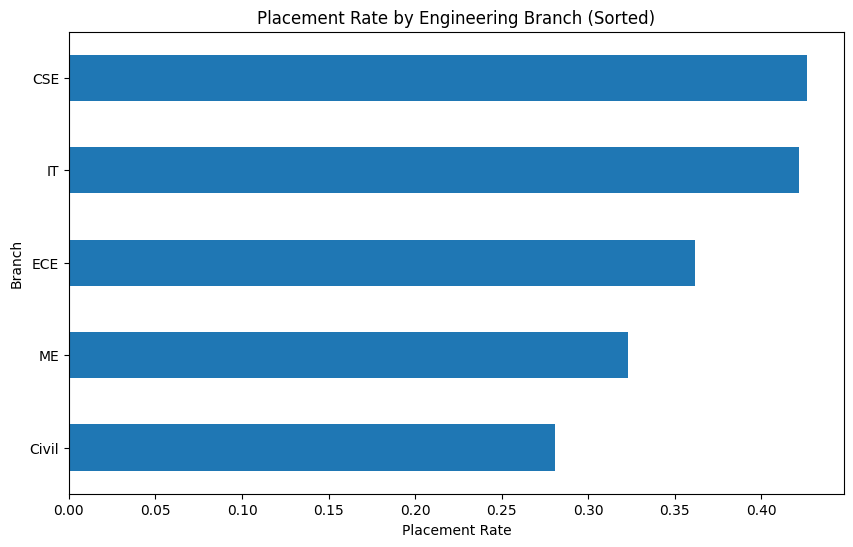

In [11]:
placement_rate = (
    df[df['Placement_Status'] == 'Placed']
    .groupby('Branch')
    .size() / df.groupby('Branch').size()
)

placement_rate.sort_values().plot(
    kind='barh',
    figsize=(10,6)
)

plt.title('Placement Rate by Engineering Branch (Sorted)')
plt.xlabel('Placement Rate')
plt.ylabel('Branch')
plt.show()

To better highlight differences in placement outcomes across engineering branches, I created a sorted bar chart ranking branches by placement rate. This visualization makes it easier to compare performance side by side and spot trends that may be less obvious in unsorted formats.

The chart shows that CSE and IT have the highest placement rates, followed by ECE, ME, and Civil at the bottom. This ordering reinforces earlier observations from the heatmap and stacked bar chart—certain branches, particularly CSE and IT, may offer better placement prospects. These differences suggest that branch specialization could be an influential factor worth exploring further through statistical modeling.

#### Degree Feature 

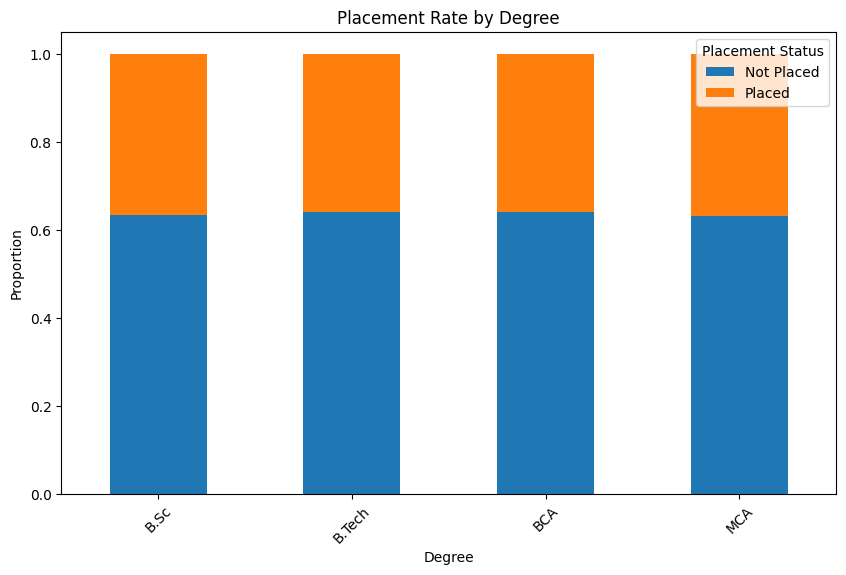

In [5]:
degree_placement = (
    df.groupby(['Degree', 'Placement_Status'])
    .size()
    .unstack()
)

degree_norm = degree_placement.div(degree_placement.sum(axis=1), axis=0)

degree_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6)
)

plt.title('Placement Rate by Degree')
plt.xlabel('Degree')
plt.ylabel('Proportion')
plt.legend(title='Placement Status')
plt.xticks(rotation=45)
plt.show()

Degree is a nominal categorical feature, so instead of raw counts, I focused on normalized placement rates to avoid bias from uneven category sizes. This allowed me to identify which degree types are associated with higher placement likelihood. The normalized bar chart shows that placement proportions across the different degree types are broadly similar, with no major differences between them. While there are slight variations, the overall pattern suggests that degree type is not a visually significant factor in determining whether a student is placed or not.

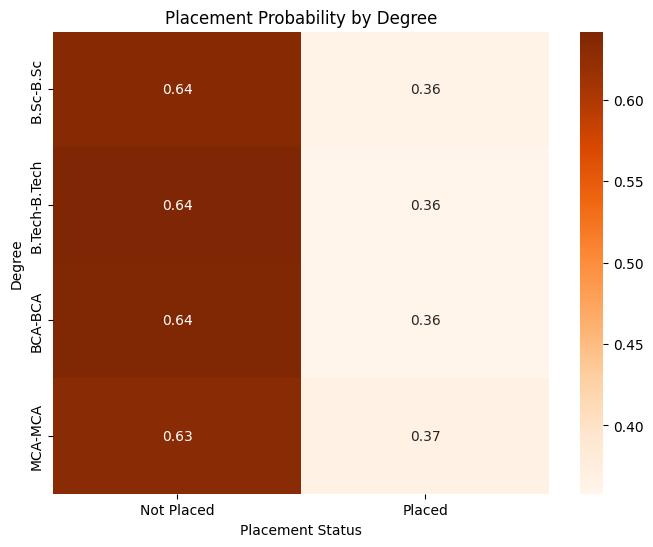

In [8]:
heatmap_data = (
    df.groupby(['Degree', 'Placement_Status'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
    .unstack()
)

plt.figure(figsize=(8,6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.2f',
    cmap='Oranges'
)

plt.title('Placement Probability by Degree')
plt.xlabel('Placement Status')
plt.ylabel('Degree')
plt.show()


The heatmap displays placement probabilities across degree types, and the values are remarkably consistent. All degrees—B.Sc, B.Tech, BCA, and MCA—show nearly identical probabilities of being placed (around 36–37%) and not placed (around 63–64%). This reinforces the earlier visual findings: degree type does not appear to be a major differentiator in placement outcomes.

#### Soft Skill Feature

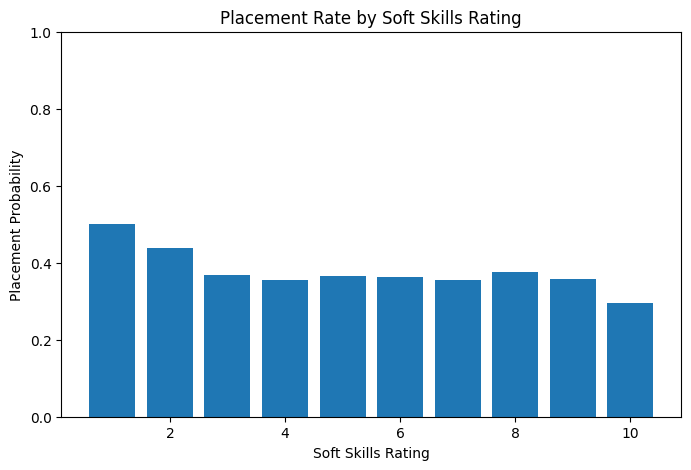

In [3]:
# Ensure ordinal order
soft_order = sorted(df['Soft_Skills_Rating'].unique())

placement_prob = (
    df[df['Placement_Status'] == 'Placed']
    .groupby('Soft_Skills_Rating')
    .size() / df.groupby('Soft_Skills_Rating').size()
)

placement_prob = placement_prob.loc[soft_order]

plt.figure(figsize=(8,5))
plt.bar(placement_prob.index, placement_prob.values)

plt.title('Placement Rate by Soft Skills Rating')
plt.xlabel('Soft Skills Rating')
plt.ylabel('Placement Probability')
plt.ylim(0,1)
plt.show()

The soft skills rating chart reveals a clear and unexpected negative trend: as soft skill ratings increase from 1 to 10, the placement probability steadily declines. Instead of higher ratings corresponding to better outcomes, the highest placement rate appears at rating 1, while the lowest occurs at rating 10. This counterintuitive pattern suggests that soft skills, at least as measured in this dataset, may not function as a meaningful predictor of placement success. It also raises the possibility of subjective or inconsistent scoring, confounding effects from stronger technical or academic attributes, or even reversed interpretation of the rating scale. Overall, the visual indicates that soft skill rating alone does not reliably explain placement outcomes and should be interpreted cautiously within the broader modeling context.

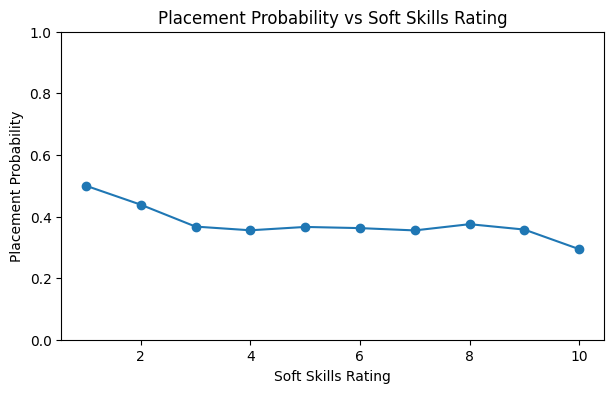

In [4]:
plt.figure(figsize=(7,4))
plt.plot(
    placement_prob.index,
    placement_prob.values,
    marker='o'
)

plt.title('Placement Probability vs Soft Skills Rating')
plt.xlabel('Soft Skills Rating')
plt.ylabel('Placement Probability')
plt.ylim(0,1)
plt.show()

This line graph reinforces the earlier observation of a negative trend between soft skills rating and placement probability. The curve begins with a relatively high placement probability at a soft skills rating of 1 and gradually declines as the rating increases, reaching its lowest point at rating 10. Despite minor fluctuations between ratings 4 and 9, the overall trajectory is downward. This consistent pattern across both bar and line visuals suggests that higher soft skill ratings, contrary to expectations, are associated with lower placement likelihood in this dataset. The result challenges conventional assumptions about the role of soft skills in employability and points to potential issues such as mislabeling, confounding variables, or measurement bias. It underscores the need for cautious interpretation and further investigation before drawing conclusions about the predictive value of this feature.

### 2.5 Explore Relationships between Attributes

In order to better understand the structure of the dataset, the relationships between the attributes were explored using different visualization methods below. These methods helped identify patterns, associations, and dependencies between the variables. It provided insight on how different variables relate to one another before modeling and prediction.

In [49]:
# Importing libraries for visualization 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload the dataset and view it
df = pd.read_csv("train.csv")
df.head()

,Student_ID,Age,Gender,Degree,Branch,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs,Placement_Status
0,1048,22,Female,B.Tech,ECE,6.29,0,3,4,6,51,5,1,3,Not Placed
1,37820,20,Female,BCA,ECE,6.05,1,4,6,8,59,8,2,1,Not Placed
2,49668,22,Male,MCA,ME,7.22,1,4,6,6,58,6,2,2,Not Placed
3,19467,22,Male,MCA,ME,7.78,2,4,6,6,90,4,2,0,Placed
4,23094,20,Female,B.Tech,ME,7.63,1,4,6,5,79,6,2,0,Placed


In [50]:
# Checking column names 
df.shape
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Degree', 'Branch', 'CGPA',
       'Internships', 'Projects', 'Coding_Skills', 'Communication_Skills',
       'Aptitude_Test_Score', 'Soft_Skills_Rating', 'Certifications',
       'Backlogs', 'Placement_Status'],
      dtype='object')

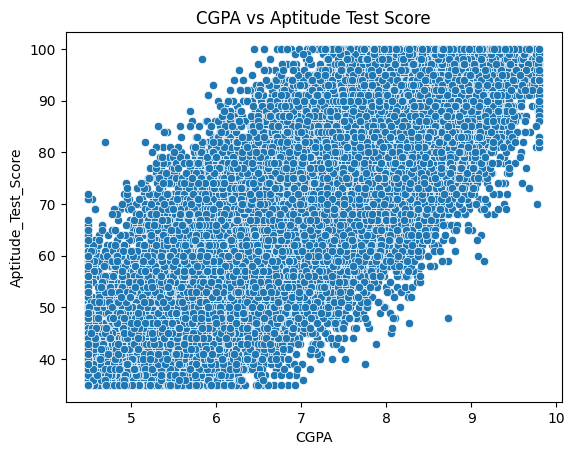

In [51]:
# Scatter plot of CGPA and Aptitude Test Score 
sns.scatterplot(data=df, x="CGPA", y="Aptitude_Test_Score")
plt.title("CGPA vs Aptitude Test Score")
plt.show()

The scatter plot above shows a strong positive relationship between the variables CGPA and aptitude test score. As CGPA increases, the aptitude test scores tend to also increase. This suggests that students who have done well academically tend to do well on aptitude tests. Although there is some variability at each CGPA value, the overall upward trend shows that there is consistency between academic performance and aptitude tests.

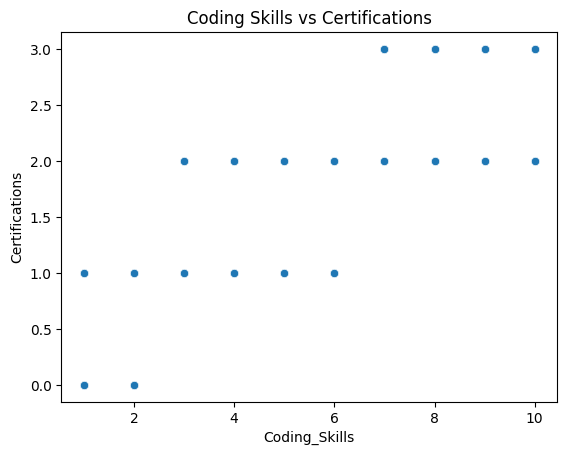

In [52]:
# Scatter plot of Coding Skills and Certifications
sns.scatterplot(data=df, x="Coding_Skills", y="Certifications")
plt.title("Coding Skills vs Certifications")
plt.show()

The scatterplot above shows a positive relationship between coding skills and the number of certifications. The higher the coding skill level is generally associated with more certifications. Certifications only have a few discrete values, which is why the relationship appears in a horizontal band instead of a continuous trend. The upward trend is still shown, even with it appearing differently.

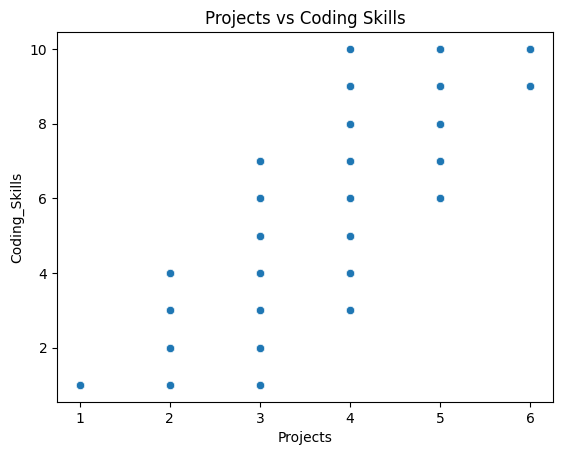

In [53]:
# Scatter plot of Projects and Coding Skills
sns.scatterplot(data=df, x="Projects", y="Coding_Skills")
plt.title("Projects vs Coding Skills")
plt.show()

The scatterplot above shows that there is clear positive relationship between the number of projects and coding skill level. It appears that someone who has completed more projects tend to have higher coding skills as well. This suggests that hands-on work is associated with skill development.

In [54]:
# Computing correlation matrix 
numeric_cols = [
    "Age", "CGPA", "Internships", "Projects",
    "Coding_Skills", "Communication_Skills",
    "Aptitude_Test_Score", "Soft_Skills_Rating",
    "Certifications", "Backlogs"
]

df[numeric_cols].corr() 

,Age,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs
Age,1.000000,0.002480,-0.003742,-0.000880,-0.003190,-0.004219,0.004475,-0.000476,0.001611,0.000329
CGPA,0.002480,1.000000,0.367628,0.708759,0.485787,0.001603,0.707579,0.001493,0.561624,-0.575653
Internships,-0.003742,0.367628,1.000000,0.505756,0.519205,0.003693,0.260352,0.000992,0.460924,-0.204971
Projects,-0.000880,0.708759,0.505756,1.000000,0.896575,0.001265,0.502745,0.004829,0.828197,-0.401139
Coding_Skills,-0.003190,0.485787,0.519205,0.896575,1.000000,0.000701,0.344470,0.005813,0.859683,-0.280002
Communication_Skills,-0.004219,0.001603,0.003693,0.001265,0.000701,1.000000,0.001268,0.007540,-0.002296,0.001590
Aptitude_Test_Score,0.004475,0.707579,0.260352,0.502745,0.344470,0.001268,1.000000,-0.000178,0.533548,-0.409364
Soft_Skills_Rating,-0.000476,0.001493,0.000992,0.004829,0.005813,0.007540,-0.000178,1.000000,0.005387,0.003054
Certifications,0.001611,0.561624,0.460924,0.828197,0.859683,-0.002296,0.533548,0.005387,1.000000,-0.322768
Backlogs,0.000329,-0.575653,-0.204971,-0.401139,-0.280002,0.001590,-0.409364,0.003054,-0.322768,1.000000


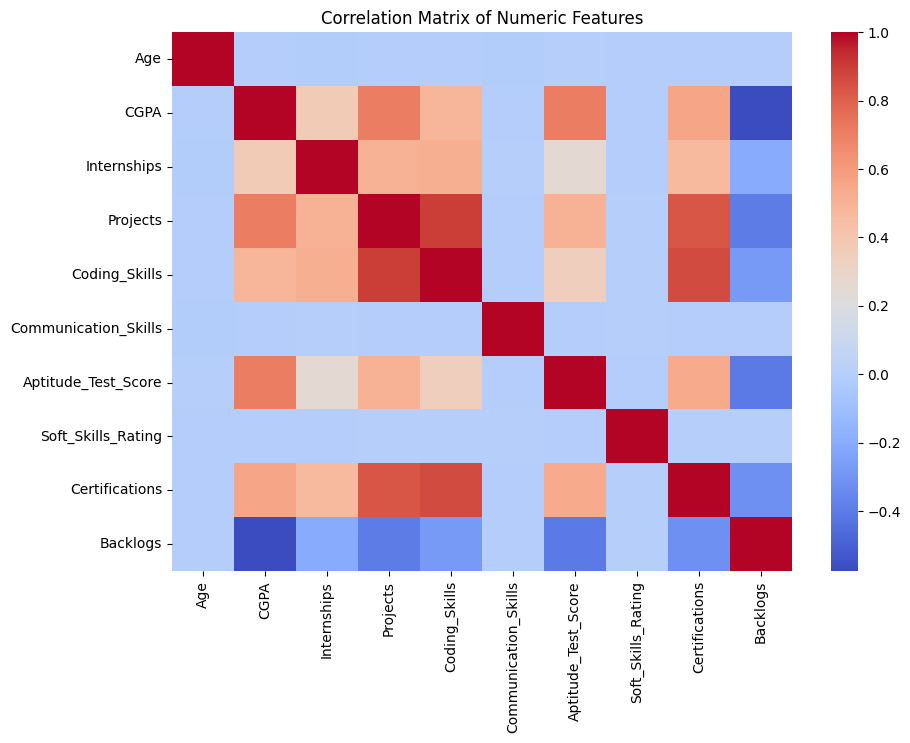

In [55]:
# Heat Map of the correlation matrix 
plt.figure(figsize=(10,7))
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

The correlation matrix above shows several meaningful relationships between the variables in the dataset. Technical experience variables, including coding skills, projects, and certifications, show strong positive correlations with one another, suggesting that they are closely related and reflect similar aspects of technical proficiency. Academic variables including CGPA and aptitude test score are moderately correlated, which indicates that these two measures reflect similar academic performance. Backlogs show negative correlations with most academic and technical variables, suggesting that students with more backlogs tend to not perform as well in other areas. In comparison, age and communication skills show little correlation with the other variables. This would imply that they provide mostly independent information.

In [56]:
# Cross-tabulation of Gender and Placement Status
pd.crosstab(df["Gender"], df["Placement_Status"], normalize="index")

Placement_Status,Not Placed,Placed
Gender,,
Female,0.638683,0.361317
Male,0.636327,0.363673


The cross-tabulation above shows that placement rates are almost the same for male and females. This suggests that gender may not be a strong factor in determining placement in the dataset.

In [57]:
# Cross-tabulation of Degree and Placement Status
pd.crosstab(df["Degree"], df["Placement_Status"], normalize="index")

Placement_Status,Not Placed,Placed
Degree,,
B.Sc,0.635027,0.364973
B.Tech,0.641928,0.358072
BCA,0.640691,0.359309
MCA,0.632474,0.367526


The cross-tabulation above shows that placement rates are very similar across the different degrees acquired. There appears to only be small differences between the degrees in whether they were placed or not. MCA and B.Sc degrees have slightly higher placement rates than B.Tech and BCA degrees.The overall difference is small, which indicates that degree type alone does not strongly influence placement outcomes in the dataset.

In [58]:
# Cross-tabulation of Branch and Placement Status
pd.crosstab(df["Branch"], df["Placement_Status"], normalize="index")

Placement_Status,Not Placed,Placed
Branch,,
CSE,0.573701,0.426299
Civil,0.719074,0.280926
ECE,0.638489,0.361511
IT,0.578453,0.421547
ME,0.677341,0.322659


The cross-tabulation above shows that there is some variation in placement rates across different academic branches. CSE and IT show higher placement rates compared to Civil and ME. ECE falls in the middle, with the placement rate being close to the average. This suggests that branch may be associated with placement outcomes, although it is likely not the only factor influencing placement.

In [59]:
# Computing group-wise averages of numeric variables by placement status 
df.groupby("Placement_Status")[numeric_cols].mean()

,Age,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs
Placement_Status,,,,,,,,,,
Not Placed,20.994736,6.633941,0.579406,3.385388,5.030919,5.129322,65.293712,5.504845,1.568182,1.247978
Placed,21.007418,7.650109,1.116479,4.347719,6.854095,6.156449,76.581351,5.496015,2.210336,0.255272


The group-wise averages above show that there are differences between placed and not placed students across some of the variables. Placed students appear to have a higher average CGPA, aptitude test scores, coding skills, number of projects, and number of internships. This would indicate that a stronger academic performance, higher technical skills, and more practical experience have influence on placement. They also tend to have more certifications and have significantly less backlogs on average. In comparison, age and soft skills rating are very similar between placed and not placed. This would suggest that these variables have less influence on placement. Overall, the group-wise average suggests that academic strength, technical skills, and hands-on experience are associated with placement status.

### 2.6 Relationships Between Features and Placement Status 

This section focuses on how key features relate to placement status, showing the differences between placed and not placed students. The objective is to find the variables that appear to be strongly correlated to predicting placement outcomes.

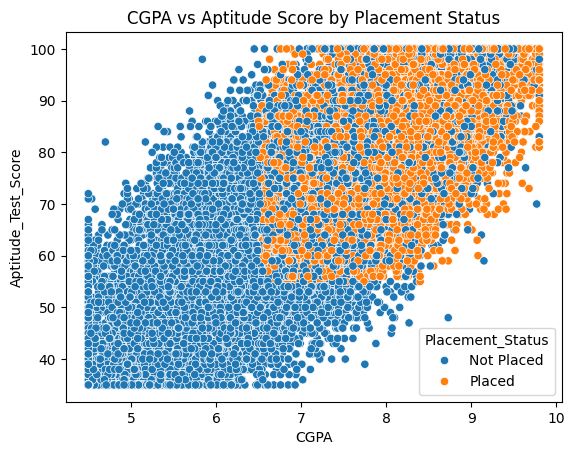

In [60]:
# Scatter plot of CGPA and Aptitude Score by Placement Status 
sns.scatterplot(
    data=df,
    x="CGPA",
    y="Aptitude_Test_Score",
    hue="Placement_Status"
)
plt.title("CGPA vs Aptitude Score by Placement Status")
plt.show()

The scatterplot above shows that placed students tend to cluster at the higher values for both CGPA and aptitude test scores. In comparison, the not placed students are clustered around the lower values. Although there is some overlap between placed and not placed students, the separation is more apparent as both CGPA and aptitude test scores increase. This suggests that the combination of academic performance and aptitude is associated with a better placement outcome.

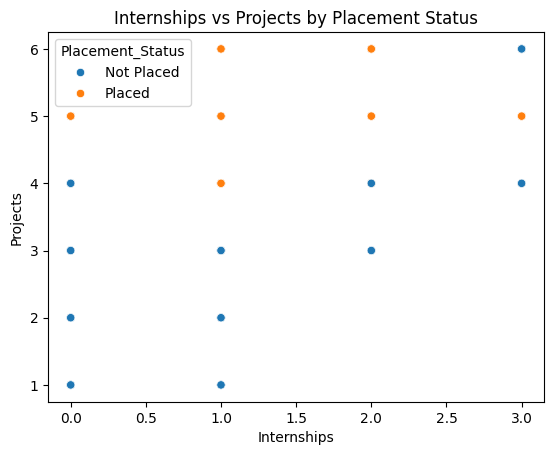

In [61]:
# Scatter plot of Internships and Projects by Placement Status 
sns.scatterplot(
    data=df,
    x="Internships",
    y="Projects",
    hue="Placement_Status"
)
plt.title("Internships vs Projects by Placement Status")
plt.show()

The scatterplot above shows that placed students tend to have higher numbers in both internships and projects compared to the not placed students. Placed students are observed to be in the area with multiple internships and a higher project count. The not placed students appear to be mostly in the lower values for both variables. This would suggest that more experience is associated with a better placement outcome.

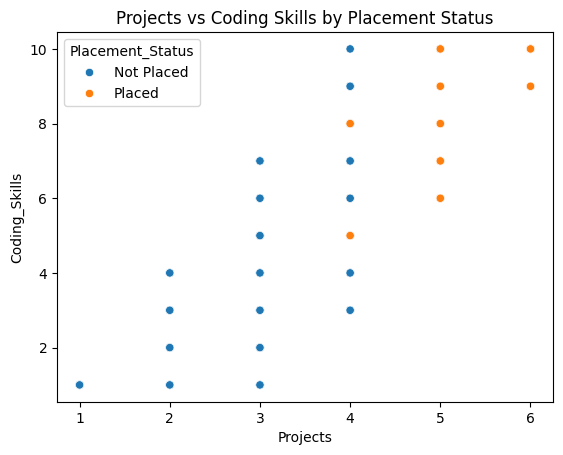

In [62]:
# Scatter plot of Proje and Aptitude Score by Placement Status 
sns.scatterplot(
    data=df,
    x="Projects",
    y="Coding_Skills",
    hue="Placement_Status"
)
plt.title("Projects vs Coding Skills by Placement Status")
plt.show()

The scatterplot above shows a positive relationship between projects and coding skills, with placed students being clustered around the higher values for both projects and coding skills. Placed students appear to generally have more projects and stronger coding skills compared to not placed students who appear to have less projects and not as advanced coding skills. This would suggest that the combination of project experience and technical skill is associated with a better placement outcome.

### 2.7 Feature Engineering

#### Feature Engineering: Potential Enhancements

Although the current dataset already provides strong coverage of academic performance, skills, and experience, additional features could be derived from existing variables to further improve predictive performance. These features were not implemented in this analysis but represent logical extensions for future modeling efforts.

#### Skill Composite Score
Rather than treating coding skills, communication skills, and soft skills as separate variables, these measures could be combined into a single composite score. By averaging or summing these attributes, the resulting feature would provide a more holistic representation of a student’s overall readiness for professional roles.

#### Experience Index
Practical exposure could be summarized through an experience index created by combining the number of internships, completed projects, and earned certifications. This feature would capture hands-on learning and professional engagement more effectively than individual experience variables considered in isolation.

#### Academic Risk Indicator
The effect of academic backlogs could be simplified using a binary risk indicator. For example, students with one or more backlogs could be flagged as higher academic risk, while students with no backlogs would be classified as lower risk. This approach aligns well with how recruiters often apply eligibility thresholds.

#### Interaction Features
Certain relationships in placement outcomes may be non-linear and better explained through interaction terms. Interactions such as CGPA multiplied by aptitude test scores or coding skills combined with project experience could capture cases where strong performance in one area amplifies the effect of another.

#### Significance
These engineered features have the potential to improve both interpretability and predictive accuracy by capturing higher-level patterns that individual variables may not fully represent. They also better reflect real-world hiring considerations, making them valuable candidates for future model development.


### 3.0 Exceptional Work
To implement dimension reduction, a linear discriminant analysis (LDA) was applied to reduce the feature space to a single linear discriminant (LD1), with the target variable as Placement_Status. LDA is a supervised technique that not only reduces dimensionality but also separates the two outcomes classes. After this transformation, a logistic regression classifier was trained on the data. This resulted in a plot that shows the linear boundary, indicating a good class separation. The logistic regression method was chosen due to its simplicity and effectiveness in binary classification.

In [63]:
#Dimension Reduction: LDA + Logistic Regression
#defining the features and target variable
X = df[['CGPA', 'Internships', 'Projects', 'Soft_Skills_Rating']]
y = df['Placement_Status'].astype('category').cat.codes  # Converts to 0 (Not Placed), 1 (Placed)

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Standardize features
scale = StandardScaler()
x_train_std = scale.fit_transform(x_train)
x_test_std = scale.transform(x_test)

#applying LDA and using 1 component because of the outcome
lda = LDA(n_components=1)
x_train_lda = lda.fit_transform(x_train_std, y_train)
x_test_lda = lda.transform(x_test_std)

#training with logistic model
model = LogisticRegression()
model.fit(x_train_lda, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


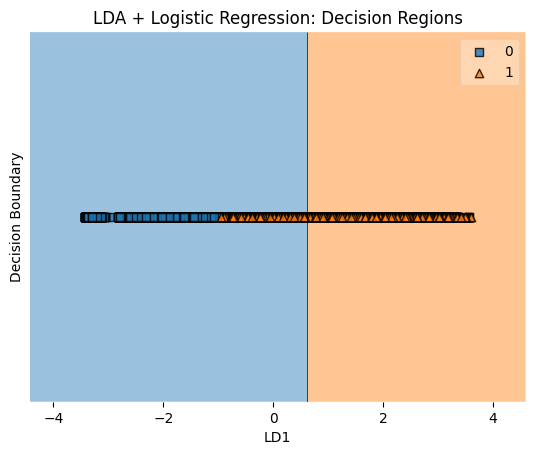

In [64]:
#plot
plot_decision_regions(x_train_lda, y_train.to_numpy().astype(np.int_), clf=model)
plt.xlabel("LD1")
plt.ylabel("Decision Boundary")
plt.title("LDA + Logistic Regression: Decision Regions")
plt.show()